In [1]:
import numpy as np
import pandas as pd
import scipy
import peakutils
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
mmm=MinMaxScaler()
data = pd.read_csv("dummy.csv")


In [3]:
data['index']=data.index
data.head()

,Month,Monthly milk production (pounds per cow),index
0,1962-01,589,0
1,1962-02,561,1
2,1962-03,640,2
3,1962-04,656,3
4,1962-05,727,4


In [4]:
ts = data['Monthly milk production (pounds per cow)'].tolist()

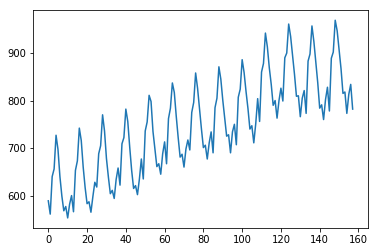

In [5]:
plt.plot(range(len(ts)),ts)

In [6]:
cb = np.array(ts)
indices = peakutils.indexes(cb, thres=0.02/max(cb), min_dist=0.1)

In [7]:
indices

array([  4,   9,  12,  16,  21,  24,  28,  33,  36,  40,  45,  48,  52,
        57,  60,  64,  69,  72,  76,  81,  84,  88,  93,  96, 100, 105,
       108, 112, 117, 120, 124, 129, 132, 136, 141, 144, 148, 153, 156],
      dtype=int64)

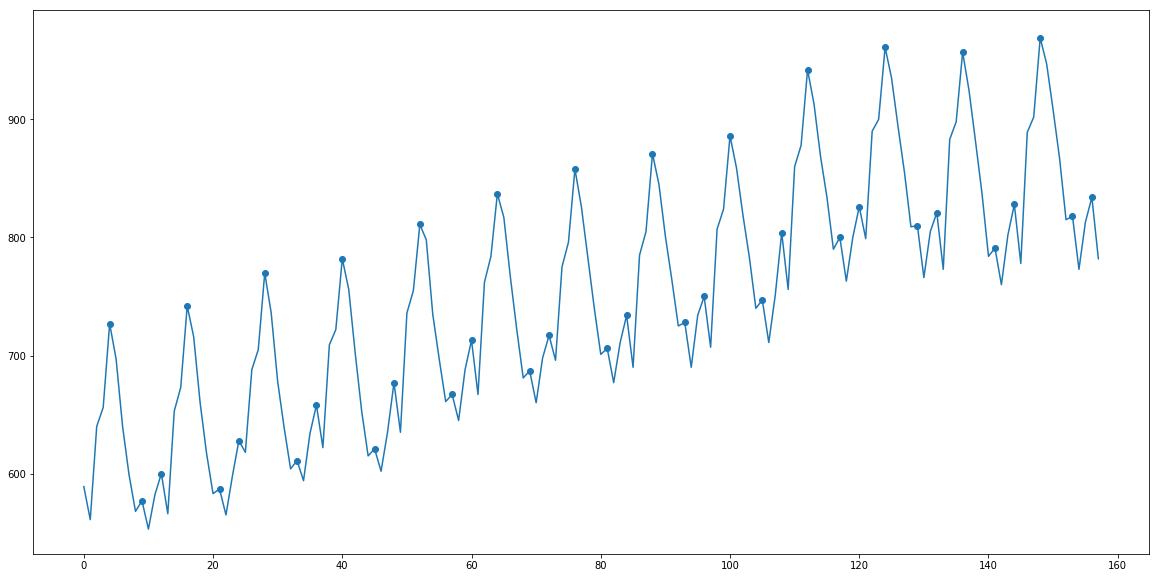

In [8]:
plt.figure(figsize=(20,10))
plt.plot(range(len(ts)),ts)
y=[ts[j] for j in indices]
plt.scatter(indices,y)

In [9]:
lt = list(zip(indices, y))   
df = pd.DataFrame(lt, columns = ['indices', 'peak value'])  
df["group"]= (df.index%3)

In [10]:
start=(df.loc[df['group'] == 0])["indices"]
end=(df.loc[df['group'] == 2])["indices"]

In [11]:
for i,j in zip(start,end):
    ggg=data[i:j+1]
    ggg[["Monthly milk production (pounds per cow)"]]=mmm.fit_transform(ggg[["Monthly milk production (pounds per cow)"]])
    ggg[["index"]]=mmm.fit_transform(ggg[["index"]])
    data[i:j+1]=ggg

C:\Users\saini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\User

C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [12]:
ts1 = data['Monthly milk production (pounds per cow)'].tolist()
ts2 = data['index'].tolist()
y1=[ts1[j] for j in indices]
y2=[ts2[j] for j in indices]
lt = list(zip(y2,y1))   
df = pd.DataFrame(lt, columns = ['index', 'peak value'])  
df["group"]=df.index//3

In [13]:
# rank of the row within each group
cats = df.groupby('group').group.rank('first').astype(int)

# use pivot_table to transform data
new_df = pd.pivot_table(df, index='group', columns=cats)

# rename to get desired columns
new_df.columns = [f'{x}{y}' for x,y in new_df.columns]

noise = np.random.normal(0,.01,13)

In [14]:
new_df["index2"]=new_df["index2"]+noise
final=new_df.copy()
final["tag"]=0

In [15]:
new_df2=final.copy()
new_df2["peak value2"]=0.5+noise
new_df2["peak value3"]=0.5+noise
new_df2["tag"]=1
final= final.append(new_df2)

In [16]:
final=final.drop(columns =["index1","index3","peak value1"])

In [17]:
label= final["tag"]
data= final.drop(columns="tag")
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (26, 3)
Label Shape:  (26,)


In [18]:
clf = svm.SVC()
clf.fit(data, label.values.ravel())

C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

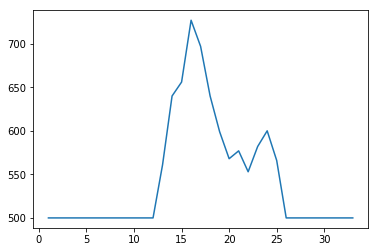

In [19]:
test1= pd.read_csv("test1.csv")
plt.plot(test1["a"],test1["b"])

In [20]:
def preprocessing(data):
    indices2 = peakutils.indexes(np.array(data['b'].tolist()), thres=0.02/max(cb), min_dist=0.1)
    ggg=data[indices2[0]:(indices2[2])+1]
    ggg[["b"]]=mmm.fit_transform(ggg[["b"]])
    ggg[["a"]]=mmm.fit_transform(ggg[["a"]])
    data[indices2[0]:indices2[2]+1]=ggg
    ts1 = data['b'].tolist()
    ts2 = data['a'].tolist()
    y1=[ts1[j] for j in indices2]
    y2=[ts2[j] for j in indices2]
    lt = list(zip(y2,y1))   
    df = pd.DataFrame(lt, columns = ['index', 'peak value'])  
    df["group"]=df.index//3
    cats = df.groupby('group').group.rank('first').astype(int)
    new_df = pd.pivot_table(df, index='group', columns=cats)
    new_df.columns = [f'{x}{y}' for x,y in new_df.columns]
    final=new_df.drop(columns =["index1","index3","peak value1"])
    return final

In [21]:
final= preprocessing(test1)
print(final)

       index2  peak value2  peak value3
group                                  
0       0.625     0.137931     0.270115


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\saini\Anaconda3\lib\site-packages\sklear

In [22]:
print(clf.predict(final))

[0]


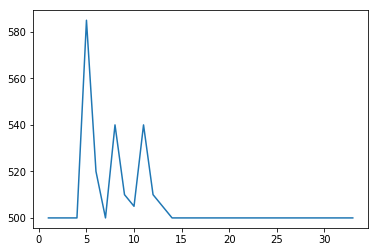

In [23]:
test2= pd.read_csv("test2.csv")
plt.plot(test2["a"],test2["b"])

In [24]:
final2= preprocessing(test2)
print(final2)

       index2  peak value2  peak value3
group                                  
0         0.5     0.470588     0.470588


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\saini\Anaconda3\lib\site-packages\sklear

In [25]:
print(clf.predict(final2))

[1]
